In [1]:
import xarray as xr
import numpy as np
import pandas as pd
# import matplotlib.pyplot 
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import cftime
from importlib import reload
from dask.diagnostics import ProgressBar
import matplotlib.ticker as mticker
import os, sys
from glob import glob
import constants
sys.path.append(constants.MODULE_DIR)
import json
# Custom plots for signal to noise functions.
import sn_plotting as sn_plot
import xarray_class_accessors as xca
warnings.filterwarnings('ignore')
import open_ds
import signal_to_noise as sn
import xarray_extender as xce
import utils
from classes import ExperimentTypes

logger = utils.get_notebook_logger()

In [3]:
notebook_number='00_6'

variable = 'tos'
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, variable, 'regrid_retimestamped')
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/tos/regrid_retimestamped'

In [4]:
models_to_get = open_ds.get_models_longer_than_length()
utils.pprint_list(models_to_get, num_start_items=7)

lenght = 7
 0. ccsm3
 1. cesm104
 2. cnrmcm61
 3. hadcm3l
 4. ipslcm5a
 5. mpiesm11
 6. mpiesm12


In [5]:
files_to_open_experiment = open_ds.get_file_names_from_from_directory(ROOT_DIR,
                                                           ExperimentTypes.ABRUPT4X,
                                                           models_to_get)

utils.pprint_list(files_to_open_experiment, num_start_items=5)

lenght = 7
 0. tos_ann_CCSM3_abrupt4x_2130_g025.nc
 1. tos_ann_CESM104_abrupt4x_5900_g025.nc
 2. tos_ann_CNRMCM61_abrupt4x_1850_g025.nc
 3. tos_ann_HadCM3L_abrupt4x_1000_g025.nc
 4. tos_ann_IPSLCM5A_abrupt4x_1000_g025.nc


In [47]:
reload(open_ds)
abrupt4x_ds = open_ds.read_and_merge_netcdfs(files_to_open_experiment, ROOT_DIR)
abrupt4x_ds

<xarray.Dataset>
Dimensions:   (time: 1200, lat: 72, lon: 144)
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 1200-12-31 00:00:00
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    depth     float64 0.0
Data variables:
    ccsm3     (time, lat, lon) float32 nan nan nan ... -0.3052 -0.306 -0.3073
    cesm104   (time, lat, lon) float32 nan nan nan ... -0.8948 -0.8953 -0.8957
    cnrmcm61  (time, lat, lon) float32 nan nan nan nan ... 5.154 5.152 5.139
    hadcm3l   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ipslcm5a  (time, lat, lon) float32 nan nan nan ... -0.1047 -0.1065 -0.1084
    mpiesm11  (time, lat, lon) float32 nan nan nan nan ... 2.307 2.314 2.321
    mpiesm12  (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Fri Jul 08 03:36:56 2016: cdo remapbil,mygrid tos_CCSM3_abr...
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...
    length:       2120

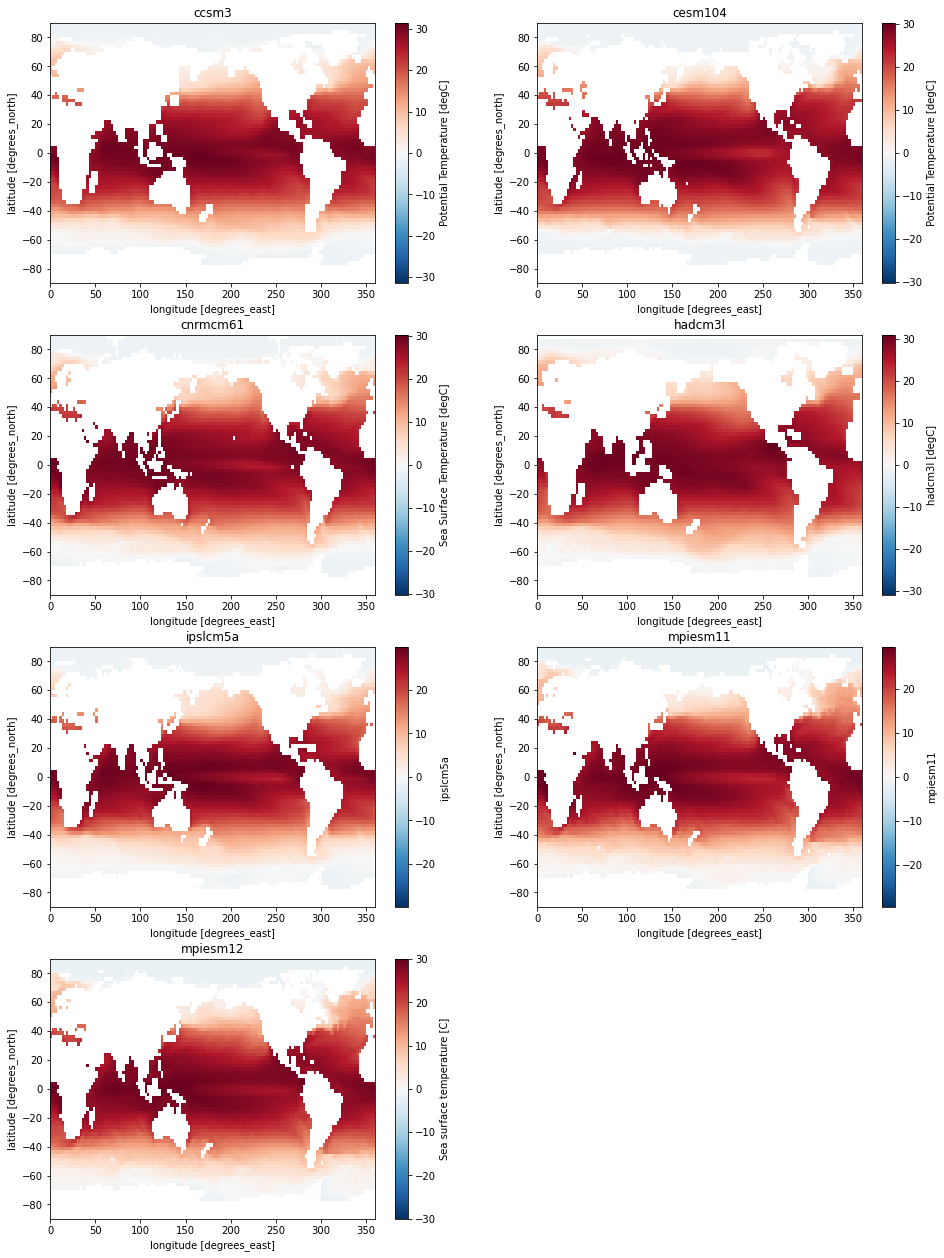

In [7]:
models = list(abrupt4x_ds.data_vars)
num_cols = 2
num_rows = int(np.ceil(len(models)/num_cols))

fig = plt.figure(figsize=(16,22))

for i,model in enumerate(models):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    abrupt4x_ds[model].isel(time=0).plot(ax=ax)
    ax.set_title(model)
    
    ax.set_title(model)

In [36]:
OUTPUT_DIR = os.path.join(constants.LONGRUNMIP_DIR, 'landesea_masks')
OUTPUT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/landesea_masks'

In [34]:
os.mkdir(os.path.join(constants.LONGRUNMIP_DIR, 'landesea_masks'))

FileExistsError: [Errno 17] File exists: '/g/data/w40/ab2313/PhD/longrunmip/landesea_masks'

In [37]:
models = list(abrupt4x_ds.data_vars)

for model in models:
    ds = abrupt4x_ds[model].isel(time=0)
    land_sea_da = xr.where(np.isfinite(ds), 0, 1).drop(['depth', 'time'], errors='ignore').squeeze()
    land_sea_da.name = 'mask'
    land_sea_da.attrs = {'Info': 'Landsea mask. 1 for land and 0 for ocean'}
    
    land_sea_da.to_netcdf(os.path.join(OUTPUT_DIR, model + '_landsea_mask.nc'))

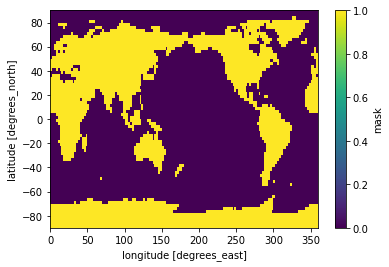

In [33]:
land_sea_da.plot()

# Test Open Data with Mask

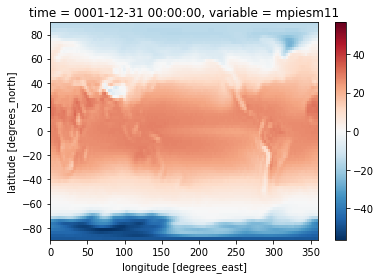

In [83]:
ds = open_ds.read_longrunmip_netcdf('tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
                                    os.path.join(constants.LONGRUNMIP_DIR, 'tas', 'regrid_retimestamped'))
ds.isel(time=0).to_array().plot()

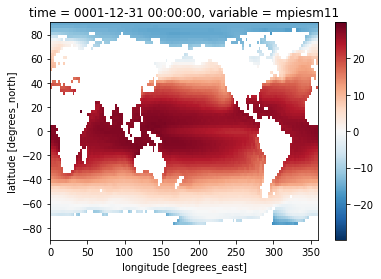

In [84]:
ds = open_ds.read_longrunmip_netcdf('tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
                                    os.path.join(constants.LONGRUNMIP_DIR, 'tas', 'regrid_retimestamped'),
                                   mask='sea')
ds.isel(time=0).to_array().plot()

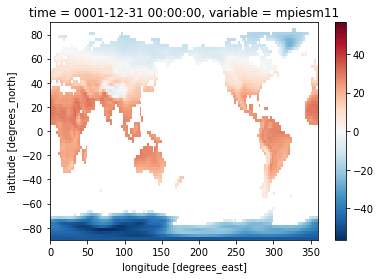

In [85]:
ds = open_ds.read_longrunmip_netcdf('tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
                                    os.path.join(constants.LONGRUNMIP_DIR, 'tas', 'regrid_retimestamped'),
                                   mask='land')
ds.isel(time=0).to_array().plot()

In [87]:
ds = open_ds.read_longrunmip_netcdf('tas_ann_MPIESM11_abrupt4x_4459_g025.nc',
                                    os.path.join(constants.LONGRUNMIP_DIR, 'tas', 'regrid_retimestamped'),
                                   mask='landos')
ds.isel(time=0).to_array().plot()

ValueError: landos is not a valid option. Please use either [land, sea]